In [ ]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#!cp /content/plot_confusion_matrix.py /content/drive/My/ Drive/CIS508

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn import tree

In [ ]:
#Read training data file
df_train = r'/gdrive/My Drive/508/STRAIN.csv'
df_train = pd.read_csv(df_train)

#Read test data file
df_test = r'/gdrive/My Drive/508/STEST.csv'
df_test = pd.read_csv(df_test)

df_train.head()
#print("=======")
#testData.head()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [ ]:
df_train.describe() #gets summary statistics on all our features

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
print("Count of columns with missing values in the train data: {}".format(len(df_train.columns[df_train.isna().sum() > 0])))

Count of columns with missing values in the train data: 0


In [ ]:
print("Count of columns with missing values in the test data: {}".format(len(df_test.columns[df_test.isna().sum() > 0])))

Count of columns with missing values in the test data: 0


In [ ]:
print("Count of columns with non-numerical values in the train data: {}".format(len(df_train.columns[(df_train.dtypes != int) & (df_train.dtypes != float)])))

Count of columns with non-numerical values in the train data: 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 31.3 MB/s 
     |████████████████████████████████| 115 kB 18.0 MB/s 


In [ ]:
X = df_train.drop('TARGET', axis=1).copy()
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [ ]:
y = df_train['TARGET'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

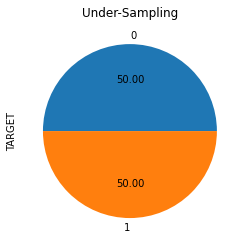

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res ,y_res = rus.fit_resample (X,y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_= ax.set_title('Under-Sampling')
y_res.value_counts()

In [ ]:
y_res.value_counts()

0    3008
1    3008
Name: TARGET, dtype: int64

In [ ]:
X = X_res
y= y_res


In [ ]:
X

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,117937,2,30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217734.570
1,108492,2,30,0.0,66.87,114.24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90154.140
2,151263,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69680.310
3,59142,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69039.690
4,131439,2,59,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99277.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,151601,2,30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45742.470
6012,151634,2,27,0.0,378.00,378.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183437.250
6013,151679,2,26,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69111.870
6014,151804,2,75,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [ ]:
# selecting top 25  fearures using random forest

In [ ]:
estimator = RandomForestClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=25,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var15', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var39_ult1', 'ind_var6', 'ind_var13_largo_0', 'ind_var33_0',
       'ind_var41_0', 'num_var14', 'num_var24', 'num_var40_0', 'saldo_var8',
       'saldo_var13', 'saldo_var24', 'delta_imp_amort_var18_1y3',
       'delta_num_aport_var17_1y3', 'delta_num_reemb_var33_1y3',
       'imp_reemb_var33_hace3', 'imp_trasp_var17_in_hace3',
       'num_compra_var44_hace3', 'saldo_medio_var5_ult1',
       'saldo_medio_var12_hace2', 'saldo_medio_var13_largo_ult3',
       'saldo_medio_var33_ult3'],
      dtype='object')


In [ ]:
X.columns[model.support_]

Index(['var15', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var39_ult1', 'ind_var6', 'ind_var13_largo_0', 'ind_var33_0',
       'ind_var41_0', 'num_var14', 'num_var24', 'num_var40_0', 'saldo_var8',
       'saldo_var13', 'saldo_var24', 'delta_imp_amort_var18_1y3',
       'delta_num_aport_var17_1y3', 'delta_num_reemb_var33_1y3',
       'imp_reemb_var33_hace3', 'imp_trasp_var17_in_hace3',
       'num_compra_var44_hace3', 'saldo_medio_var5_ult1',
       'saldo_medio_var12_hace2', 'saldo_medio_var13_largo_ult3',
       'saldo_medio_var33_ult3'],
      dtype='object')

In [ ]:
rfc_25_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc_25_cols])

      var15  imp_op_var39_comer_ult3  imp_op_var41_comer_ult1  \
0        30                     0.00                     0.00   
1        30                   114.24                    66.87   
2        23                     0.00                     0.00   
3        23                     0.00                     0.00   
4        59                     0.00                     0.00   
...     ...                      ...                      ...   
6011     30                     0.00                     0.00   
6012     27                   378.00                   378.00   
6013     26                     0.00                     0.00   
6014     75                     0.00                     0.00   
6015     61                     0.00                     0.00   

      imp_op_var39_ult1  ind_var6  ind_var13_largo_0  ind_var33_0  \
0                  0.00         0                  0            0   
1                 66.87         0                  0            0   
2           

In [ ]:
# selecting top 25 features using Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=25,
    n_population=50, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=5,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var15', 'imp_op_var41_efect_ult3', 'ind_var2', 'ind_var27',
       'ind_var41', 'num_var5_0', 'num_var13_medio', 'num_var17',
       'num_op_var40_hace3', 'num_op_var39_hace2', 'imp_aport_var17_ult1',
       'imp_reemb_var33_ult1', 'num_aport_var13_hace3',
       'num_compra_var44_ult1', 'num_var22_hace2', 'num_meses_var8_ult3',
       'num_meses_var12_ult3', 'num_meses_var29_ult3', 'num_meses_var44_ult3',
       'num_var45_hace3', 'saldo_medio_var5_ult3',
       'saldo_medio_var13_corto_hace2', 'saldo_medio_var17_hace2',
       'saldo_medio_var29_ult1'],
      dtype='object')


In [ ]:
X.columns[model.support_]

Index(['var3', 'var15', 'imp_op_var40_ult1', 'imp_op_var39_efect_ult1',
       'imp_op_var39_ult1', 'ind_var12_0', 'ind_var20_0', 'ind_var24',
       'ind_var46_0', 'num_var5_0', 'num_var5', 'num_var17', 'num_var26_0',
       'num_op_var41_ult3', 'num_op_var39_ult3', 'num_var30_0', 'num_var34',
       'saldo_var30', 'saldo_var33', 'var36', 'num_med_var45_ult3',
       'num_op_var41_efect_ult3', 'saldo_medio_var5_ult1',
       'saldo_medio_var13_corto_hace3'],
      dtype='object')

In [ ]:
gbc_25_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc_25_cols])

      var15  imp_op_var39_comer_ult3  imp_op_var41_comer_ult1  \
0        30                     0.00                     0.00   
1        30                   114.24                    66.87   
2        23                     0.00                     0.00   
3        23                     0.00                     0.00   
4        59                     0.00                     0.00   
...     ...                      ...                      ...   
6011     30                     0.00                     0.00   
6012     27                   378.00                   378.00   
6013     26                     0.00                     0.00   
6014     75                     0.00                     0.00   
6015     61                     0.00                     0.00   

      imp_op_var39_ult1  ind_var6  ind_var13_largo_0  ind_var33_0  \
0                  0.00         0                  0            0   
1                 66.87         0                  0            0   
2           

In [ ]:
# Top 50 features using GBC classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=50,
    n_population=50, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=5,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var3', 'var15', 'imp_op_var41_efect_ult3', 'ind_var2', 'ind_var6',
       'ind_var13_corto_0', 'ind_var14', 'ind_var18', 'ind_var24_0',
       'ind_var25', 'ind_var27_0', 'ind_var32_cte', 'ind_var37_0',
       'ind_var44_0', 'num_var8', 'num_var13_0', 'num_var24_0',
       'num_op_var39_hace3', 'num_var28', 'num_var30', 'num_var32_0',
       'saldo_var6', 'saldo_var20', 'saldo_var30', 'imp_amort_var18_ult1',
       'imp_aport_var17_ult1', 'imp_var7_emit_ult1', 'imp_reemb_var13_ult1',
       'imp_var43_emit_ult1', 'num_aport_var17_hace3', 'num_aport_var33_hace3',
       'num_var22_ult1', 'num_med_var45_ult3', 'num_meses_var12_ult3',
       'num_meses_var33_ult3', 'num_op_var40_comer_ult1',
       'num_op_var40_comer_ult3', 'num_op_var41_comer_ult3',
       'num_reemb_var13_ult1', 'num_reemb_var17_ult1',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_ult1',
       'saldo_medio_var12_ult1', 'saldo_medio_var33_hace3', 'var38'],
      dtype='object')


In [ ]:
gbc_50_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc_25_cols])

      var15  imp_op_var39_comer_ult3  imp_op_var41_comer_ult1  \
0        30                     0.00                     0.00   
1        30                   114.24                    66.87   
2        23                     0.00                     0.00   
3        23                     0.00                     0.00   
4        59                     0.00                     0.00   
...     ...                      ...                      ...   
6011     30                     0.00                     0.00   
6012     27                   378.00                   378.00   
6013     26                     0.00                     0.00   
6014     75                     0.00                     0.00   
6015     61                     0.00                     0.00   

      imp_op_var39_ult1  ind_var6  ind_var13_largo_0  ind_var33_0  \
0                  0.00         0                  0            0   
1                 66.87         0                  0            0   
2           

In [ ]:
#  selecting top 50 using Random forest classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=50,
    n_population=50, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=10,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var15', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'ind_var12_0', 'ind_var13_corto',
       'ind_var14', 'ind_var17', 'ind_var30', 'ind_var40', 'ind_var46',
       'num_var8', 'num_var20_0', 'num_op_var41_hace3', 'num_var29_0',
       'num_var30', 'num_var42_0', 'saldo_var1', 'saldo_var5', 'saldo_var6',
       'saldo_var29', 'saldo_var34', 'delta_num_aport_var17_1y3',
       'delta_num_trasp_var17_in_1y3', 'imp_amort_var18_hace3',
       'imp_aport_var17_hace3', 'imp_reemb_var17_hace3', 'imp_var43_emit_ult1',
       'imp_trasp_var17_in_hace3', 'imp_trasp_var33_in_ult1', 'var21',
       'num_aport_var33_hace3', 'num_var7_recib_ult1', 'num_var22_ult1',
       'num_med_var22_ult3', 'num_med_var45_ult3', 'num_op_var40_efect_ult3',
       'num_op_var41_efect_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var13_corto_hace2', 'saldo_medio_var17_ult1',
       'saldo_medio_var33_hace3', 'saldo_medio_var44_ult3'],
      dtype='

In [ ]:
#Increasing the size  of  majority class

In [ ]:
X = df_train.drop('TARGET', axis=1).copy()
y = df_train['TARGET'].copy()

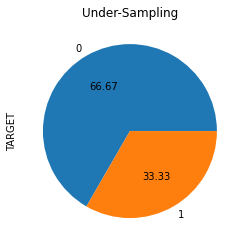

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5)
X_res ,y_res = rus.fit_resample (X,y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_= ax.set_title('Under-Sampling')

In [ ]:
y_res.value_counts()

0    6016
1    3008
Name: TARGET, dtype: int64

In [ ]:
X = X_res
y= y_res


In [ ]:
# Random Forest classifier -top 25 features

In [ ]:
estimator = RandomForestClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=25,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var3', 'var15', 'imp_op_var40_ult1', 'imp_op_var39_efect_ult1',
       'imp_op_var39_ult1', 'ind_var12_0', 'ind_var20_0', 'ind_var24',
       'ind_var46_0', 'num_var5_0', 'num_var5', 'num_var17', 'num_var26_0',
       'num_op_var41_ult3', 'num_op_var39_ult3', 'num_var30_0', 'num_var34',
       'saldo_var30', 'saldo_var33', 'var36', 'num_med_var45_ult3',
       'num_op_var41_efect_ult3', 'saldo_medio_var5_ult1',
       'saldo_medio_var13_corto_hace3'],
      dtype='object')


In [ ]:
rfc2_50_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc2_50_cols])


      var3  var15  imp_op_var40_ult1  imp_op_var39_efect_ult1  \
0        2     89                0.0                      0.0   
1        2     46                0.0                      0.0   
2        2     50                0.0                    630.0   
3        2     23                0.0                      0.0   
4        2     30                0.0                      0.0   
...    ...    ...                ...                      ...   
9019     2     30                0.0                      0.0   
9020     2     27                0.0                    540.0   
9021     2     26                0.0                      0.0   
9022     2     75                0.0                      0.0   
9023     2     61                0.0                      0.0   

      imp_op_var39_ult1  ind_var12_0  ind_var20_0  ind_var24  ind_var46_0  \
0                  0.00            0            0          0            0   
1                405.12            0            0          0     

In [ ]:
# Random Gradient Boosting Classifier -top 25 features

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=25,
    n_population=50, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=5,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var15', 'ind_var13', 'ind_var26_cte', 'num_var37', 'saldo_var5',
       'saldo_var14', 'saldo_var41', 'saldo_var42',
       'delta_imp_amort_var18_1y3', 'delta_imp_trasp_var33_in_1y3',
       'delta_num_reemb_var13_1y3', 'delta_num_trasp_var17_in_1y3',
       'imp_reemb_var13_ult1', 'imp_venta_var44_hace3',
       'num_trasp_var17_in_ult1', 'saldo_medio_var13_medio_ult3',
       'saldo_medio_var33_ult1'],
      dtype='object')


In [ ]:
gbc2_25_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc2_50_cols])


      var3  var15  imp_op_var40_ult1  imp_op_var39_efect_ult1  \
0        2     89                0.0                      0.0   
1        2     46                0.0                      0.0   
2        2     50                0.0                    630.0   
3        2     23                0.0                      0.0   
4        2     30                0.0                      0.0   
...    ...    ...                ...                      ...   
9019     2     30                0.0                      0.0   
9020     2     27                0.0                    540.0   
9021     2     26                0.0                      0.0   
9022     2     75                0.0                      0.0   
9023     2     61                0.0                      0.0   

      imp_op_var39_ult1  ind_var12_0  ind_var20_0  ind_var24  ind_var46_0  \
0                  0.00            0            0          0            0   
1                405.12            0            0          0     

In [ ]:
# slecting top-50 features in random forest classifier

In [ ]:
estimator = RandomForestClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=50,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var15', 'imp_op_var40_efect_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'ind_var8_0', 'ind_var20', 'ind_var24',
       'ind_var28', 'ind_var41', 'ind_var44', 'num_var4', 'num_var5_0',
       'num_var14_0', 'num_var18', 'num_var20', 'num_op_var40_ult3',
       'num_var27_0', 'num_var30_0', 'num_var31', 'num_var32', 'num_var41',
       'saldo_var1', 'saldo_var8', 'saldo_var12', 'saldo_var30', 'saldo_var33',
       'saldo_var40', 'var36', 'delta_imp_aport_var33_1y3',
       'delta_imp_reemb_var13_1y3', 'delta_imp_venta_var44_1y3',
       'imp_amort_var34_hace3', 'imp_aport_var33_ult1',
       'num_aport_var33_hace3', 'num_meses_var5_ult3',
       'num_meses_var13_largo_ult3', 'num_op_var40_comer_ult1',
       'num_op_var40_efect_ult1', 'num_reemb_var13_ult1',
       'num_var43_recib_ult1', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_ult1', 'saldo_medio_var8_hace3',
       'saldo_medio_v

In [ ]:
rfc2_50_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc_25_cols])

      var15  imp_op_var39_comer_ult3  imp_op_var41_comer_ult1  \
0        89                     0.00                     0.00   
1        46                   662.67                   405.12   
2        50                  1405.89                   773.79   
3        23                     0.00                     0.00   
4        30                   107.64                     0.00   
...     ...                      ...                      ...   
9019     30                     0.00                     0.00   
9020     27                   378.00                   378.00   
9021     26                     0.00                     0.00   
9022     75                     0.00                     0.00   
9023     61                     0.00                     0.00   

      imp_op_var39_ult1  ind_var6  ind_var13_largo_0  ind_var33_0  \
0                  0.00         0                  0            0   
1                405.12         0                  0            0   
2           

In [ ]:
# selecting top 50 features using gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=50,
    n_population=50, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=5,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['var15', 'imp_op_var40_comer_ult1', 'imp_op_var40_ult1',
       'imp_op_var39_efect_ult3', 'ind_var13_0', 'ind_var14', 'ind_var17_0',
       'ind_var29_0', 'ind_var33_0', 'ind_var37', 'num_var14_0', 'num_var26',
       'num_var25', 'num_op_var41_ult1', 'num_var30_0', 'num_var30',
       'saldo_var13_medio', 'saldo_var31', 'saldo_var42',
       'imp_aport_var13_ult1', 'imp_reemb_var13_hace3',
       'imp_trasp_var33_out_ult1', 'num_var22_ult1', 'num_var22_ult3',
       'num_meses_var5_ult3', 'num_meses_var13_largo_ult3',
       'num_op_var40_comer_ult1', 'saldo_medio_var8_ult1',
       'saldo_medio_var13_medio_hace2', 'saldo_medio_var29_hace3', 'var38'],
      dtype='object')


In [ ]:
gbc2_50_cols = list(model.get_support(indices=True))
print(X.iloc[:,rfc2_50_cols])

      var15  imp_op_var40_efect_ult3  imp_op_var41_efect_ult1  \
0        89                      0.0                      0.0   
1        46                      0.0                      0.0   
2        50                      0.0                    630.0   
3        23                      0.0                      0.0   
4        30                      0.0                      0.0   
...     ...                      ...                      ...   
9019     30                      0.0                      0.0   
9020     27                      0.0                    540.0   
9021     26                      0.0                      0.0   
9022     75                      0.0                      0.0   
9023     61                      0.0                      0.0   

      imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
0                         0.0               0.00                      0.0   
1                         0.0             405.12                 

In [ ]:
# Top 25 and 50 features

In [ ]:
X = df_train.drop('TARGET', axis=1).copy()
y = df_train['TARGET'].copy()


0    3008
1    3008
Name: TARGET, dtype: int64

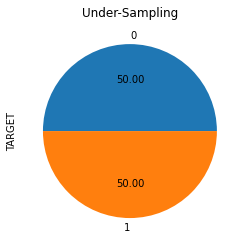

In [ ]:
X = df_train.drop('TARGET', axis=1).copy()
y = df_train['TARGET'].copy()
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res ,y_res = rus.fit_resample (X,y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_= ax.set_title('Under-Sampling')
y_res.value_counts()

In [ ]:
# considering K = 25 
from sklearn.feature_selection import SelectKBest
k25_selector = SelectKBest(k=25)
df1 = k25_selector.fit_transform(X_res, y_res)
feature_indices_ND_25 = list(k25_selector.get_support(indices=True))


# k 50
k50_selector = SelectKBest(k=50)
df2 = k50_selector.fit_transform(X_res, y_res)
feature_indices_ND_50 = list(k50_selector.get_support(indices=True))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  27  37  38  44  45  57  58  59  60  62  72  73  81  85  86  93
 103 104 110 111 132 133 134 135 137 146 147 156 162 163 166 171 175 180
 181 182 187 190 193 195 196 203 204 205 206 207 215 216 217 218 219 221
 222 223 224 233 235 237 239 240 243 244 245 246 247 248 249 250 251 262
 263 272 286 304 306 308 309 314 315 316 317 318 319 320 321 322 328 349
 350 351 352 358 359 360 366] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  27  37  38  44  45  57  58  59  60  62  72  73  81  85  86  93
 103 104 110 111 132 133 134 135 1

In [ ]:
# considering for increased majority class

0    6016
1    3008
Name: TARGET, dtype: int64

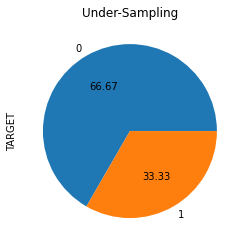

In [ ]:
X = df_train.drop('TARGET', axis=1).copy()
y = df_train['TARGET'].copy()
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5)
X_res ,y_res = rus.fit_resample (X,y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_= ax.set_title('Under-Sampling')
y_res.value_counts()

In [ ]:
# considering K = 25 
from sklearn.feature_selection import SelectKBest
k25_selector = SelectKBest(k=25)
df3 = k25_selector.fit_transform(X_res, y_res)
feature_indices_ID_25 = list(k25_selector.get_support(indices=True))


# k 50
k50_selector = SelectKBest(k=50)
df4 = k50_selector.fit_transform(X_res, y_res)
feature_indices_ID_50 = list(k50_selector.get_support(indices=True))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  27  37  38  44  45  57  58  59  60  62  72  73  81  85  86  93
 103 104 110 111 132 133 134 135 137 146 147 156 162 163 166 171 175 180
 181 182 187 190 193 195 196 203 204 205 206 207 215 216 217 218 219 221
 222 223 224 233 235 237 239 240 243 244 245 246 247 248 249 250 251 262
 263 272 286 304 306 308 309 314 315 316 317 318 319 320 321 322 328 349
 350 351 352 358 359 360 366] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  27  37  38  44  45  57  58  59  60  62  72  73  81  85  86  93
 103 104 110 111 132 133 134 135 1

In [ ]:
# getting the top 25  features  for random forest 

In [ ]:
top_25_rfc_ID=list(set(rfc_25_cols).symmetric_difference(feature_indices_ND_25))
print(top_25_rfc_ID)

[5, 139, 11, 272, 18, 148, 25, 281, 283, 284, 153, 30, 31, 32, 33, 34, 159, 27, 35, 39, 167, 172, 177, 50, 183, 64, 194, 195, 70, 331, 80, 337, 210, 215, 89, 91, 348, 97, 98, 99, 100, 105, 107, 364, 239, 115, 243]


In [ ]:
# getting top 25 by Gardient boosting 

In [ ]:
top_25_gbc_ID=list(set(gbc_25_cols).symmetric_difference(feature_indices_ND_25))
print(top_25_rfc_ID)

[5, 139, 11, 272, 18, 148, 25, 281, 283, 284, 153, 30, 31, 32, 33, 34, 159, 27, 35, 39, 167, 172, 177, 50, 183, 64, 194, 195, 70, 331, 80, 337, 210, 215, 89, 91, 348, 97, 98, 99, 100, 105, 107, 364, 239, 115, 243]


In [ ]:
# Top 50 features for random forest

In [ ]:
top_50_rfc_ID=list(set(rfc2_50_cols).symmetric_difference(feature_indices_ND_50))
print(top_50_rfc_ID)

[9, 13, 15, 16, 17, 24, 25, 30, 31, 32, 33, 34, 35, 39, 40, 48, 49, 59, 64, 77, 80, 81, 84, 90, 91, 94, 97, 98, 99, 100, 105, 106, 111, 113, 114, 115, 123, 132, 139, 141, 143, 148, 152, 155, 156, 159, 164, 167, 169, 172, 186, 189, 191, 199, 201, 208, 223, 225, 230, 260, 264, 268, 283, 284, 285, 294, 296, 305, 312, 329, 331, 334, 340, 341, 343, 344, 362]


In [ ]:
# Top 50 features for gradient boosting

In [ ]:
top_50_gbc_ID=list(set(gbc2_50_cols).symmetric_difference(feature_indices_ND_50))
print(top_25_rfc_ID)

[5, 139, 11, 272, 18, 148, 25, 281, 283, 284, 153, 30, 31, 32, 33, 34, 159, 27, 35, 39, 167, 172, 177, 50, 183, 64, 194, 195, 70, 331, 80, 337, 210, 215, 89, 91, 348, 97, 98, 99, 100, 105, 107, 364, 239, 115, 243]


In [ ]:
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn_genetic import GASearchCV, GAFeatureSelectionCV


In [ ]:
#Hyperparameter tuning with the top 25

In [ ]:
rfc_param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.05),
                 'criterion': Categorical(['gini', 'entropy']),
                 'class_weight': Categorical(['balanced']),
                  'bootstrap': Categorical([True, False])   
                  }

# The base classifier to tune
rfc_clf = RandomForestClassifier()

# The main class from sklearn-genetic-opt
rfc_estimator = GASearchCV(estimator=rfc_clf,
                          cv=3,
                          scoring='accuracy',
                          generations=5,
                          param_grid=rfc_param_grid,
                          n_jobs=-1,
                          verbose=True)

rfc_estimator.fit(X.iloc[:,rfc_25_cols],y)

# Best parameters found
print('RF PARAMS:')
print(rfc_estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.782936	0.0184174  	0.817969   	0.741686   
1  	100   	0.795669	0.0139477  	0.817969   	0.748856   
2  	100   	0.803637	0.0115471  	0.822599   	0.767048   
3  	100   	0.807007	0.0100522  	0.822652   	0.77377    
4  	100   	0.810016	0.00842966 	0.823323   	0.78799    
5  	100   	0.810115	0.00911524 	0.828479   	0.786951   
RF PARAMS:
{'min_weight_fraction_leaf': 0.013492819285379324, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}


In [ ]:
df_test.iloc[:,rfc_25_cols]

,var15,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var39_ult1,ind_var6,ind_var13_largo_0,ind_var33_0,ind_var41_0,num_var14,num_var24,...,delta_imp_amort_var18_1y3,delta_num_aport_var17_1y3,delta_num_reemb_var33_1y3,imp_reemb_var33_hace3,imp_trasp_var17_in_hace3,num_compra_var44_hace3,saldo_medio_var5_ult1,saldo_medio_var12_hace2,saldo_medio_var13_largo_ult3,saldo_medio_var33_ult3
0,32,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,6.00,0.0,0.0,0.0
1,35,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0.0,0,0,0.0,0,3.00,0.0,0.0,0.0
2,23,0.0,0.0,60.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,51.45,0.0,0.0,0.0
3,24,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,0.00,0.0,0.0,0.0
4,23,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,30.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,23,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,0.00,0.0,0.0,0.0
75814,26,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,3.00,0.0,0.0,0.0
75815,24,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,90.00,0.0,0.0,0.0
75816,40,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0.0,0,0,0.0,0,3.00,0.0,0.0,0.0


In [ ]:
selected_rf_params = {'min_weight_fraction_leaf': 0.04756918112590284, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
rf_clf = RandomForestClassifier(**selected_rf_params)

# training the model on split data, and predicting outcomes for validation set 
rf_clf.fit(X.iloc[:,rfc_25_cols],y)
y_pred = rf_clf.predict(X.iloc[:,rfc_25_cols])
rfc_predict_top_25=pd.DataFrame(y_pred)
rfc_predict_top_25.to_csv("/gdrive/My Drive/CIS_508/Assignment_4/Final/rfc_predict_top_25.csv")

In [ ]:
#Hyper parameter tuning for Gradiant Boosting with top 25

In [ ]:
gbs_param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.05),
                  'learning_rate': Continuous(1, 1.5),
                  'max_features': Categorical(['auto', 'sqrt']),
                'loss': Categorical(['deviance', 'exponential'])}
# The base classifier to tune
gb_clf = GradientBoostingClassifier()

# The main class from sklearn-genetic-opt
gb_estimator = GASearchCV(estimator=gb_clf,
                          cv=3,
                          scoring='accuracy',
                          generations=5,
                          param_grid=gbs_param_grid,
                          n_jobs=-1,
                          verbose=True)
gb_estimator.fit(X.iloc[:,gbc_25_cols],y)

# Best parameters found
print('\n GB PARAMS:')
print(gb_estimator.best_params_)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.955096	0.0296231  	0.960458   	0.75442    
1  	100   	0.960374	6.95072e-05	0.960458   	0.960182   
2  	100   	0.960414	3.69834e-05	0.960458   	0.960287   
3  	100   	0.960429	1.62945e-05	0.960458   	0.960379   
4  	100   	0.96043 	1.71008e-05	0.960458   	0.960366   
5  	100   	0.960434	1.70501e-05	0.960458   	0.960392   

 GB PARAMS:
{'min_weight_fraction_leaf': 0.0409511168022692, 'learning_rate': 1.1225811859805537, 'max_features': 'sqrt', 'loss': 'deviance'}


In [ ]:
selected_gb_params = {'min_weight_fraction_leaf': 0.03291271363388132, 'learning_rate': 1.1137565970194412, 'max_features': 'sqrt', 'loss': 'exponential'}

# tuned GB model
gb_clf = GradientBoostingClassifier(**selected_gb_params)

# training the model on split data, and predicting outcomes for validation set 
gb_clf.fit(X.iloc[:,gbc_25_cols],y)
y_pred = gb_clf.predict(df_test.iloc[:,rfc_25_cols,y])
gbc_predict_top_25=pd.DataFrame(y_pred)
gbc_predict_top_25.to_csv("/gdrive/My Drive/CIS_508/Assignment_4/Final/gbc_predict_top_25.csv",encoding='utf-8')

IndexingError: ignored

In [ ]:
selected_gb_params = {'min_weight_fraction_leaf': 0.03291271363388132, 'learning_rate': 1.1137565970194412, 'max_features': 'sqrt', 'loss': 'exponential'}
gb_clf = GradientBoostingClassifier(**selected_gb_params)

# training the model on split data, and predicting outcomes for validation set 
gb_clf.fit(X.iloc[:,rfc_25_cols],y)
y_pred = rf_clf.predict(X.iloc[:,rfc_25_cols])
gbc_predict_top_25=pd.DataFrame(y_pred)
rfc_predict_top_25.to_csv("/gdrive/My Drive/CIS_508/Assignment_4/Final/gbc_predict_top_25.csv")

In [ ]:
#Hyper parameter tuning for Random Forest with top 50

In [ ]:
rfc_param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.05),
                 'criterion': Categorical(['gini', 'entropy']),
                 'class_weight': Categorical(['balanced']),
                  'bootstrap': Categorical([True, False])   
                  }

# The base classifier to tune
rfc_clf = RandomForestClassifier()

# The main class from sklearn-genetic-opt
rfc_estimator = GASearchCV(estimator=rfc_clf,
                          cv=3,
                          scoring='accuracy',
                          generations=3,
                          param_grid=rfc_param_grid,
                          n_jobs=-1,
                          verbose=True)

rfc_estimator.fit(df_train.iloc[:,rfc2_50_cols],y)

# Best parameters found
print('RF PARAMS:')
print(rfc_estimator.best_params_)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.711389	0.00353416 	0.720258   	0.703012   
1  	100   	0.715326	0.00519728 	0.745291   	0.710024   
2  	100   	0.719566	0.00902378 	0.747027   	0.710616   
3  	100   	0.718992	0.00800042 	0.747027   	0.713286   
RF PARAMS:
{'min_weight_fraction_leaf': 0.048412844752679214, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}


In [ ]:
selected_rf_params = {'min_weight_fraction_leaf': 0.04578896630942972, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
rf_clf = RandomForestClassifier(**selected_rf_params)

# training the model on split data, and predicting outcomes for validation set 
rf_clf.fit(df_train.iloc[:,rfc2_50_cols],y)
y_pred = rf_clf.predict(df_test.iloc[:,rfc2_50_cols])
rfc_predict_top_50=pd.DataFrame(y_pred)
rfc_predict_top_50.to_csv("/gdrive/My Drive/CIS_508/Assignment_4/Final/rfc_predict_top_50.csv",encoding='utf-8')

In [ ]:
#Hyper parameter tuning for Gradiant Boosting with top 50

In [ ]:
gb_param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.05),
                  'learning_rate': Continuous(1, 1.5),
                  'max_features': Categorical(['auto', 'sqrt']),
                'loss': Categorical(['deviance', 'exponential'])}

# The base classifier to tune
gb_clf = GradientBoostingClassifier()

# The main class from sklearn-genetic-opt
gb_estimator = GASearchCV(estimator=gb_clf,
                          cv=3,
                          scoring='accuracy',
                          generations=3,
                          param_grid=gb_param_grid,
                          n_jobs=-1,
                          verbose=True)

gb_estimator.fit(df_train.iloc[:,gbc2_50_cols],y)

# Best parameters found
print('\n GB PARAMS:')
print(gb_estimator.best_params_)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.942394	0.0420746  	0.960431   	0.752591   
1  	100   	0.959983	0.00141872 	0.960458   	0.950237   
2  	100   	0.960337	0.000107513	0.960471   	0.959997   
3  	100   	0.960381	7.12771e-05	0.960471   	0.960129   

 GB PARAMS:
{'min_weight_fraction_leaf': 0.04990428923922495, 'learning_rate': 1.0056905714342366, 'max_features': 'auto', 'loss': 'exponential'}


In [ ]:
selected_gb_params = {'min_weight_fraction_leaf': 0.03291271363388132, 'learning_rate': 1.1137565970194412, 'max_features': 'sqrt', 'loss': 'exponential'}

# tuned GB model
gb_clf = GradientBoostingClassifier(**selected_gb_params)

# training the model on split data, and predicting outcomes for validation set 

gb_clf.fit(df_train.iloc[:,gbc2_50_cols],y)
y_pred = gb_clf.predict(df_test.iloc[:,gbc2_50_cols])
gbc_predict_top_50=pd.DataFrame(y_pred)
gbc_predict_top_50.to_csv("/gdrive/My Drive/CIS_508/Assignment_4/Final/rfc_predict_top_25.csv",encoding='utf-8')